In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("FlightFare_Dataset.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10001, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB


In [5]:
# Handling Date_of_Journey Column
data["journey_date"]=pd.to_datetime(data["Date_of_Journey"], format= "%d/%m/%Y").dt.day
data["journey_Month"]=pd.to_datetime(data["Date_of_Journey"], format= "%d/%m/%Y").dt.month
data.drop(["Date_of_Journey"],axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [6]:
# Handling Dep_Time Column
data["Dep_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_minute"]=pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_Month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [7]:
#Handling Arrival_time column
data["Arrival_hour"]= pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_minute"]= pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(["Arrival_Time"], axis=1, inplace=True)

In [8]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [9]:
data.Additional_Info.value_counts()

No info                         7825
In-flight meal not included     1844
No check-in baggage included     299
1 Long layover                    19
Change airports                    6
No Info                            3
Business class                     3
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [10]:
#Handling Duration column

dur= list(data.Duration)

for i in range(len(dur)):
    if len(dur[i].split()) != 2:
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   
        else:
            dur[i] = "0h " + dur[i] 
            
# data["Duration_hour"]=pd.Series([i for i, j in dur[i]])

Duration_hour=[]
Duration_minute=[]

for i in dur:
    
    a,b =i.split(sep="h")
    Duration_hour.append(int(a))
    m=b.strip()
    Duration_minute.append(int(m[0:len(m)-1]))

data["Duration_hour"]=Duration_hour
data["Duration_minute"]=Duration_minute
data.drop("Duration", axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [11]:
data.shape

(10001, 15)

In [12]:
data["Airline"].value_counts()

Jet Airways                          3598
IndiGo                               1927
Air India                            1634
Multiple carriers                    1129
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
air_count=data["Airline"].value_counts()
check=list(air_count.index[0:8])
type(check)

list

In [14]:
#Handling Airline Column

airline=data["Airline"]
new_airline=[]


for i in range(airline.shape[0]):
    if airline[i] in check:
        new_airline.append(airline[i])
    else:
        new_airline.append("Other")
data["Airline"]=new_airline
data["Airline"].value_counts()

Jet Airways          3598
IndiGo               1927
Air India            1634
Multiple carriers    1129
SpiceJet              769
Vistara               447
Air Asia              296
GoAir                 179
Other                  22
Name: Airline, dtype: int64

In [15]:
airplane_dummy = pd.get_dummies(data.Airline)
print(airplane_dummy.shape)
airplane_dummy.head()

(10001, 9)


,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Other,SpiceJet,Vistara
0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [16]:
#Handling Source Column

data.Source.value_counts()

Delhi       4258
Kolkata     2678
Banglore    2058
Mumbai       647
Chennai      360
Name: Source, dtype: int64

In [17]:
source = pd.get_dummies(data.Source)
source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [18]:
#Handling Destination Column

data.Destination.value_counts()

Cochin       4258
Banglore     2678
Delhi        1191
New Delhi     867
Hyderabad     647
Kolkata       360
Name: Destination, dtype: int64

In [19]:
destination =pd.get_dummies(data.Destination)
destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [20]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [21]:
# from sklearn.preprocessing import LabelEncoder
# label= LabelEncoder()

# data.Total_Stops= label.fit_transform(data.Total_Stops)
# data.Total_Stops.value_counts()

Total_Stops = pd.get_dummies(data.Total_Stops)
Total_Stops.head()

,1 stop,2 stops,3 stops,4 stops,non-stop
0,0,0,0,0,1
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [22]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_date,journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [23]:

data.drop(["Airline","Source","Destination","Total_Stops"],  axis=1, inplace=True)
data.head()

,Price,journey_date,journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45


In [24]:
data=pd.concat([airplane_dummy, source,destination,Total_Stops,data],axis=1)
data.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Other,SpiceJet,Vistara,Banglore,...,non-stop,Price,journey_date,journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,0,0,1,0,0,0,0,0,1,...,1,3897,24,3,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,...,0,7662,1,5,5,50,13,15,7,25
2,0,0,0,0,1,0,0,0,0,0,...,0,13882,9,6,9,25,4,25,19,0
3,0,0,0,1,0,0,0,0,0,0,...,0,6218,12,5,18,5,23,30,5,25
4,0,0,0,1,0,0,0,0,0,1,...,0,13302,1,3,16,50,21,35,4,45


In [25]:
x=data.loc[:,data.columns!="Price"]
y=data["Price"]

In [26]:
# feature Importance

from sklearn.ensemble import ExtraTreesRegressor
sel= ExtraTreesRegressor()
sel.fit(x,y)
sel.feature_importances_


array([6.33121567e-04, 8.36202597e-03, 1.04442639e-03, 4.35796214e-03,
       7.91775506e-02, 2.48145853e-02, 3.17634925e-02, 1.55568359e-03,
       5.92368931e-03, 1.82107240e-02, 6.34806906e-04, 2.35993333e-03,
       2.03551696e-03, 4.48930933e-03, 1.81686867e-03, 2.95733547e-03,
       3.01528819e-04, 5.07847079e-03, 3.69108400e-04, 2.90643336e-02,
       3.28894100e-02, 3.45286447e-03, 8.97425211e-04, 6.01665166e-05,
       3.62333318e-01, 1.50023767e-01, 5.49465941e-02, 2.43796249e-02,
       2.08554443e-02, 2.85036868e-02, 2.05192947e-02, 5.85051143e-02,
       1.76828160e-02])

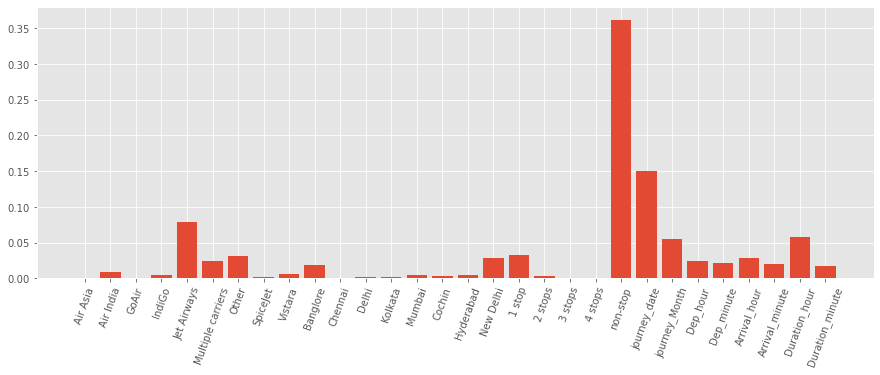

In [27]:
imp=pd.Series(list(sel.feature_importances_), index=x.columns)
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.bar(imp.index,imp.values)
plt.xticks( rotation=70);


In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
final={}
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.2, random_state=10)
train_x.shape, test_x.shape, train_y.shape, test_y.shape


((8000, 33), (2001, 33), (8000,), (2001,))

In [29]:
model = RandomForestRegressor()
param={'criterion':['squared_error', 'absolute_error'],
        'n_estimators':[100,150,200,300],
        'max_depth':[1,2],
       "bootstrap":[False]
        
       }
model_GCV= GridSearchCV(model,param, cv=5, verbose=10)
model_GCV.fit(train_x, train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START bootstrap=False, criterion=squared_error, max_depth=1, n_estimators=100
[CV 1/5; 1/16] END bootstrap=False, criterion=squared_error, max_depth=1, n_estimators=100;, score=0.367 total time=   0.2s
[CV 2/5; 1/16] START bootstrap=False, criterion=squared_error, max_depth=1, n_estimators=100
[CV 2/5; 1/16] END bootstrap=False, criterion=squared_error, max_depth=1, n_estimators=100;, score=0.426 total time=   0.2s
[CV 3/5; 1/16] START bootstrap=False, criterion=squared_error, max_depth=1, n_estimators=100
[CV 3/5; 1/16] END bootstrap=False, criterion=squared_error, max_depth=1, n_estimators=100;, score=0.484 total time=   0.2s
[CV 4/5; 1/16] START bootstrap=False, criterion=squared_error, max_depth=1, n_estimators=100
[CV 4/5; 1/16] END bootstrap=False, criterion=squared_error, max_depth=1, n_estimators=100;, score=0.397 total time=   0.2s
[CV 5/5; 1/16] START bootstrap=False, criterion=squared_error, max_dept

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2],
                         'n_estimators': [100, 150, 200, 300]},
             verbose=10)

In [30]:
model_GCV.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=2, n_estimators=200)

In [35]:
from sklearn.metrics import accuracy_score
pred=model_GCV.predict(test_x)
pred[:5]

array([12699.11976549, 12699.11976549,  9940.79544646,  9940.79544646,
        4858.19852083])

In [60]:
tes = ["Jet Airways","Delhi","Cochin", "2 stops", 9, 5, 20,0, 4,25,8, 25 ]


In [33]:
data_c = pd.read_excel("FlightFare_Dataset.xlsx")
data_c.iloc[937:938,:]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
937,Jet Airways,9/05/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:00,04:25 10 May,8h 25m,2 stops,No info,16263


In [36]:
test_y[:5]

937     16263
9355    14388
2293     8603
192      6412
8675     3687
Name: Price, dtype: int64

In [61]:
tes1=tes[:4]
tes2=tes[4:]

In [88]:
input1 = pd.DataFrame(np.array(tes1).reshape(1,-1),columns= data_c.columns[:4])
input1=pd.get_dummies(input1)

input2= pd.DataFrame(np.array(tes2).reshape(1,-1),columns= x.columns[-8:])
input2

,journey_date,journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,9,5,20,0,4,25,8,25


In [97]:
final= input1.reindex(columns=x.columns[:25], fill_value=0)
final

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Other,SpiceJet,Vistara,Banglore,...,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 stop,2 stops,3 stops,4 stops,non-stop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
final_input= pd.concat([final,input2], axis = 1)
final_input

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,Other,SpiceJet,Vistara,Banglore,...,4 stops,non-stop,journey_date,journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,0,0,0,0,0,0,0,0,0,0,...,0,0,9,5,20,0,4,25,8,25


In [99]:
# model_GCV.predict(final_input)
len(data.columns)

34

In [100]:
len(x.columns)

33

In [101]:
len(final_input.columns)

33

In [102]:
model_GCV.predict(final_input)

array([9940.79544646])